# Spam Email Classification

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
df = pd.read_csv("mail_data.csv") # creating dataframe 


print(df.head())
print(df.columns)

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
Index(['Category', 'Message'], dtype='object')


In [ ]:
print(df.isnull().sum())  #Check missing values 

# handling missing values
df.dropna(inplace= True)  

# handling duplicates 
df.drop_duplicates(inplace= True)

Category    0
Message     0
dtype: int64


C:\Users\Shreyas\AppData\Local\Temp\ipykernel_7252\1176623755.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df["Category"], palette= 'coolwarm')


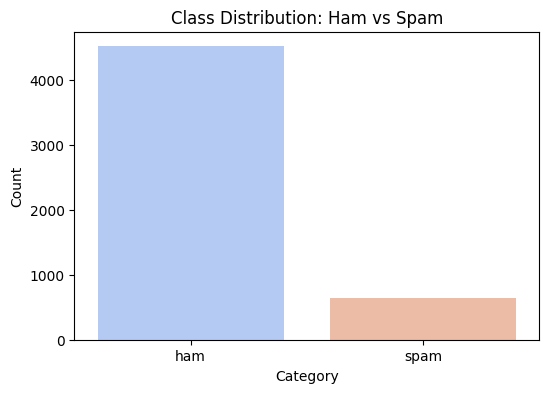

In [ ]:
plt.figure(figsize=(6,4)) #Learning data occurence
sns.countplot(x = df["Category"], palette= 'coolwarm') 
plt.title("Class Distribution: Ham vs Spam")  
plt.xlabel("Category")  
plt.ylabel("Count")  
plt.show()

Classifying ham as 0 and spam as 1 for the classification model 

In [9]:
df["Category"] = df["Category"].map({'ham' : 0, 'spam' :1})

Getting sample datas 

In [10]:
print(df["Message"].sample(5, random_state=42))  # Print 5 random messages

3031    Also sir, i sent you an email about how to log...
495                      Are you free now?can i call now?
2942    My supervisor find 4 me one lor i thk his stud...
3911    She.s good. She was wondering if you wont say ...
3360    Sorry I missed your call let's talk when you h...
Name: Message, dtype: object


Checking special chars

In [11]:
import re  

# Checking special characters in df 
special_characters = df[df["Message"].str.contains(r"[@#$%^&*()<>?/|}{~:]", regex=True)]
print(special_characters.head(5))


    Category                                            Message
2          1  Free entry in 2 a wkly comp to win FA Cup fina...
5          1  FreeMsg Hey there darling it's been 3 week's n...
7          0  As per your request 'Melle Melle (Oru Minnamin...
9          1  Had your mobile 11 months or more? U R entitle...
10         0  I'm gonna be home soon and i don't want to tal...


checking html_tags 

In [13]:
html_tags = df[df["Message"].str.contains(r"<.*?>", regex = True)] 
print(html_tags.head(5))

      Category                                            Message
690          1  <Forwarded from 448712404000>Please CALL 08712...
2267         1  <Forwarded from 88877>FREE entry into our £250...
2297         1  <Forwarded from 21870000>Hi - this is your Mai...
2620         1  <Forwarded from 21870000>Hi - this is your Mai...
4112         1  URGENT! Your Mobile number has been awarded a ...


Detecting Non-English chars 

In [15]:
from langdetect import detect
  
# Function to detect language
def detect_language(text):
    try:
        return detect(text)
    except:
        return "error" 
    
df["Language"] = df["Message"].apply(detect_language) 

print(df["Language"].value_counts())

Language
en       4701
af         60
nl         39
so         35
fr         34
cy         31
no         31
id         28
it         22
da         21
de         21
ca         16
sv         15
tl         13
sw         12
et         10
hr          9
es          9
vi          8
sq          7
pl          7
sl          6
sk          6
tr          5
pt          3
error       3
fi          2
ro          1
cs          1
lt          1
Name: count, dtype: int64


Detect Irreveleant characters

In [16]:
# Find rows with too many numbers or symbols
weird_chars = df[df["Message"].str.contains(r"[^a-zA-Z0-9\s]", regex=True)]
print(weird_chars.sample(5))


      Category                                            Message Language
1411         0                 Pls speak to that customer machan.       en
4903         1  * FREE* POLYPHONIC RINGTONE Text SUPER to 8713...       en
808          0                  Boooo you always work. Just quit.       en
2331         0   Long beach lor. Expected... U having dinner now?       en
2600         0  Gosh that , what a pain. Spose I better come t...       en


## Combine Multiple Datasets for Diversity